In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob
from scipy.interpolate import interp1d as i1

In [5]:
jfo_0507 = ascii.read('SN2020jfo_20200507_redblu_130458.033.ascii', format = 'no_header')
jfo_0508 = ascii.read('SN2020jfo_20200508_redblu_130804.977.ascii', format = 'no_header')
jfo_0512 = ascii.read('SN2020jfo_20200512_redblu_083808.860.ascii', format = 'no_header') 
jfo_0516 = ascii.read('SN2020jfo_20200516_redblu_114620.495.ascii', format = 'no_header') 
jfo_0519 = ascii.read('SN2020jfo_20200519_redblu_120343.217.ascii', format = 'no_header') 
jfo_0523 = ascii.read('SN2020jfo_20200523_KAST.csv', format = 'csv', header_start = 18, data_start = 19)#KAST 
jfo_0524 = ascii.read('SN2020jfo_20200524_redblu_105947.534.ascii', format = 'no_header') 
jfo_0528 = ascii.read('SN2020jfo_20200528_redblu_113620.751.ascii', format = 'no_header') 
jfo_0605 = ascii.read('SN2020jfo_20200605_redblu_113353.824.ascii', format = 'no_header') 
jfo_0613 = ascii.read('SN2020jfo_20200613_redblu_071655.424.ascii', format = 'no_header') 
jfo_0626 = ascii.read('SN2020jfo_20200626_redblu_063302.731.ascii', format = 'no_header') 
jfo_0706 = ascii.read('SN2020jfo_20200706_redblu_101237.107.ascii' , format = 'no_header') 
jfo_0714 = ascii.read('SN2020jfo_20200714_redblu_061749.943.ascii', format = 'no_header') 
jfo_0723 = ascii.read('SN2020jfo_20200723_redblu_060251.843.ascii', format = 'no_header') 
jfo_0727 = ascii.read('SN2020jfo_20200727_KAST.csv', format = 'csv', header_start = 18, data_start = 19) #KAST 
jfo_0801 = ascii.read('SN2020jfo_20200801_redblu_082611.283.ascii', format = 'no_header') 
jfo_210212 = ascii.read('SN2020jfo_20210212_LRIS.csv', format = 'csv', header_start = 18, data_start = 19)  #LRIS
jfo_210510 = ascii.read('SN2020jfo_20210510_LRIS.csv', format = 'csv', header_start = 18, data_start = 19) #LRIS 


<>:136: SyntaxWarning: invalid escape sequence '\A'
<>:136: SyntaxWarning: invalid escape sequence '\A'
/var/folders/_s/tc8h43192s58wb4s6m2lbfcw0000gn/T/ipykernel_36118/2345150092.py:136: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength $(\AA)$', fontsize = 15)


Text(0.5, 1.0, 'SN 2020jfo spectral sequence')

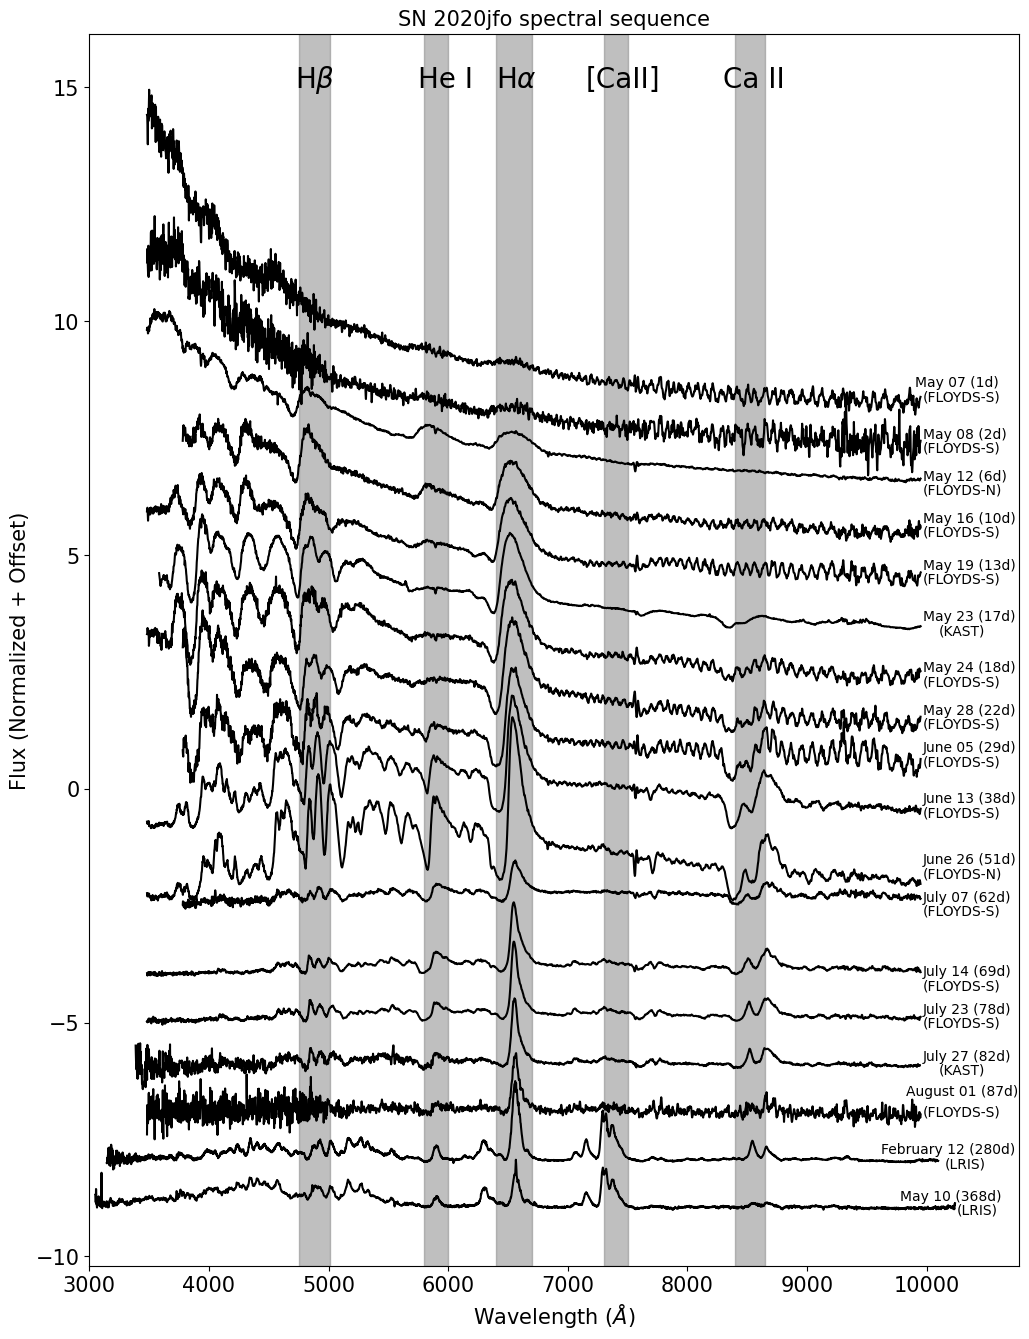

In [6]:
# jfo spectra 

jfo_0507_wl = jfo_0507['col1']
jfo_0507_fx = jfo_0507['col2']

jfo_0508_wl = jfo_0508['col1'] 
jfo_0508_fx = jfo_0508['col2']

jfo_0512_wl = jfo_0512['col1']
jfo_0512_fx = jfo_0512['col2']

jfo_0516_wl = jfo_0516['col1']
jfo_0516_fx = jfo_0516['col2']

jfo_0519_wl = jfo_0519['col1']
jfo_0519_fx = jfo_0519['col2']

jfo_0523_wl = jfo_0523['wavelength']
jfo_0523_fx = jfo_0523['flux']

jfo_0524_wl = jfo_0524['col1']
jfo_0524_fx = jfo_0524['col2']

jfo_0528_wl = jfo_0528['col1']
jfo_0528_fx = jfo_0528['col2']

jfo_0605_wl = jfo_0605['col1']
jfo_0605_fx = jfo_0605['col2']

jfo_0613_wl = jfo_0613['col1']
jfo_0613_fx = jfo_0613['col2']

jfo_0626_wl = jfo_0626['col1']
jfo_0626_fx = jfo_0626['col2']

jfo_0706_wl = jfo_0706['col1']
jfo_0706_fx = jfo_0706['col2']

jfo_0714_wl = jfo_0714['col1']
jfo_0714_fx = jfo_0714['col2']

jfo_0723_wl = jfo_0723['col1']
jfo_0723_fx = jfo_0723['col2']

jfo_0727_wl = jfo_0727['wavelength']
jfo_0727_fx = jfo_0727['flux']

jfo_0801_wl = jfo_0801['col1']
jfo_0801_fx = jfo_0801['col2']

jfo_210212_wl = jfo_210212['wavelength']
jfo_210212_fx = jfo_210212['flux']

jfo_210510_wl = jfo_210510['wavelength']
jfo_210510_fx = jfo_210510['flux']

jfo_z = 1 + 0.00502

plt.figure(figsize=(12, 16))
plt.plot(jfo_0507_wl / jfo_z , jfo_0507_fx / np.median(jfo_0507_fx) + 8, color ='k') #1 days 

plt.plot(jfo_0508_wl / jfo_z, jfo_0508_fx / np.median(jfo_0508_fx) + 7, color ='k') #2d 

plt.plot(jfo_0512_wl / jfo_z, jfo_0512_fx / np.median(jfo_0512_fx) + 6.3, color ='k') #6d 

plt.plot(jfo_0516_wl / jfo_z, jfo_0516_fx / np.median(jfo_0516_fx) + 5, color ='k') #10d 

plt.plot(jfo_0519_wl / jfo_z, jfo_0519_fx / np.median(jfo_0519_fx) + 4, color ='k') #13d 

plt.plot(jfo_0523_wl / jfo_z, jfo_0523_fx / np.median(jfo_0523_fx) + 3, color ='k') #16d 

plt.plot(jfo_0524_wl / jfo_z, jfo_0524_fx / np.median(jfo_0524_fx) + 2, color ='k') #17d 

plt.plot(jfo_0528_wl / jfo_z, jfo_0528_fx / np.median(jfo_0528_fx) + 1, color ='k') #21d 

plt.plot(jfo_0605_wl / jfo_z, jfo_0605_fx / np.median(jfo_0605_fx), color ='k') #29d 

plt.plot(jfo_0613_wl / jfo_z, jfo_0613_fx / np.median(jfo_0613_fx) - 1, color ='k') #37d 

plt.plot(jfo_0626_wl / jfo_z, jfo_0626_fx / np.median(jfo_0626_fx) - 2.5, color ='k') #50d 

plt.plot(jfo_0706_wl / jfo_z, jfo_0706_fx / np.median(jfo_0706_fx)/4 - 2.5, color ='k') 

plt.plot(jfo_0714_wl / jfo_z, jfo_0714_fx / np.median(jfo_0714_fx)/5 - 4, color ='k') 

plt.plot(jfo_0723_wl / jfo_z, jfo_0723_fx / np.median(jfo_0723_fx)/6 - 5, color ='k')

plt.plot(jfo_0727_wl / jfo_z, jfo_0727_fx / np.median(jfo_0727_fx)/7 - 6, color ='k')

plt.plot(jfo_0801_wl / jfo_z, jfo_0801_fx / np.median(jfo_0801_fx)/8 - 7, color ='k')

plt.plot(jfo_210212_wl / jfo_z, jfo_210212_fx / np.median(jfo_210212_fx)/9 - 8, color ='k') 

plt.plot(jfo_210510_wl / jfo_z, jfo_210510_fx / np.median(jfo_210510_fx)/9 - 9, color ='k')

plt.text(9900, 8.6, 'May 07 (1d)')
plt.text(9970, 8.3, '(FLOYDS-S)')
plt.text(9970, 7.5, 'May 08 (2d)')
plt.text(9970, 7.2, '(FLOYDS-S)')
plt.text(9970, 6.6, 'May 12 (6d)')
plt.text(9970, 6.3,'(FLOYDS-N)')
plt.text(9970, 5.7, 'May 16 (10d)')
plt.text(9970, 5.4, '(FLOYDS-S)')
plt.text(9970, 4.7, 'May 19 (13d)')
plt.text(9970, 4.4, '(FLOYDS-S)')
plt.text(9970, 3.6, 'May 23 (17d)')
plt.text(10100, 3.3, '(KAST)')
plt.text(9970, 2.5, 'May 24 (18d)')
plt.text(9970, 2.2, '(FLOYDS-S)')
plt.text(9970, 1.6, 'May 28 (22d)')
plt.text(9970, 1.3, '(FLOYDS-S)')
plt.text(9970, 0.8, 'June 05 (29d)')
plt.text(9970, 0.5, '(FLOYDS-S)')
plt.text(9970, -0.3, 'June 13 (38d)')
plt.text(9970, -0.6, '(FLOYDS-S)')
plt.text(9970, -1.6, 'June 26 (51d)')
plt.text(9970, -1.9, '(FLOYDS-N)')
plt.text(9970, -2.4, 'July 07 (62d)')
plt.text(9970, -2.7, '(FLOYDS-S)')
plt.text(9970, -4.0, 'July 14 (69d)')
plt.text(9970, -4.3, '(FLOYDS-S)')
plt.text(9970, -4.8, 'July 23 (78d)')
plt.text(9970, -5.1, '(FLOYDS-S)')
plt.text(9970, -5.8, 'July 27 (82d)')
plt.text(10100, -6.1, '(KAST)')
plt.text(9830, -6.55, 'August 01 (87d)')
plt.text(9970, -7.0, '(FLOYDS-S)')
plt.text(9620, -7.8, 'February 12 (280d)')
plt.text(10150, -8.1, '(LRIS)')
plt.text(9780, -8.8, 'May 10 (368d)')
plt.text(10250, -9.1, '(LRIS)')
plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 15, r'H$\beta$', fontsize = 20)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 15, r'He I', fontsize = 20)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 15, r'H$\alpha$', fontsize = 20)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 15, '[CaII]', fontsize = 20)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 15, 'Ca II', fontsize = 20)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(3000, 10775)
plt.title('SN 2020jfo spectral sequence', fontsize = 15)

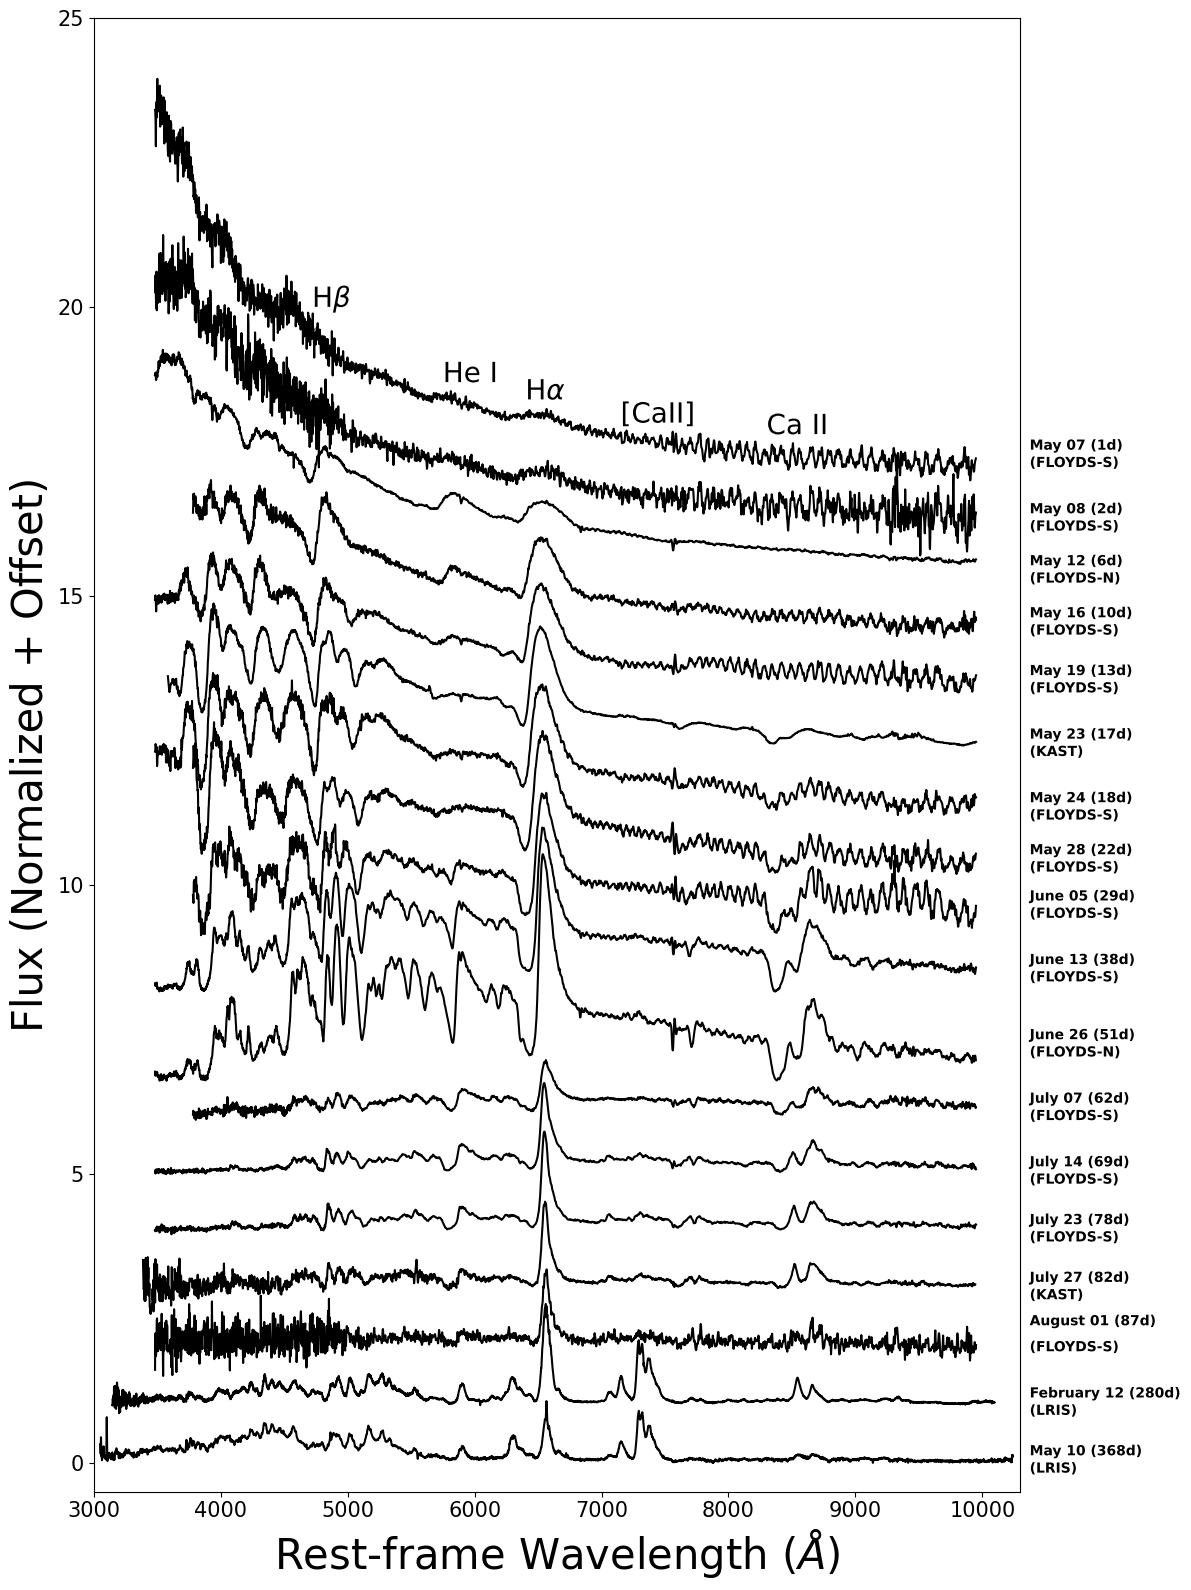

In [39]:
import matplotlib.patheffects as pe
jfo_0507_wl = jfo_0507['col1'];       jfo_0507_fx = jfo_0507['col2']
jfo_0508_wl = jfo_0508['col1'];       jfo_0508_fx = jfo_0508['col2']
jfo_0512_wl = jfo_0512['col1'];       jfo_0512_fx = jfo_0512['col2']
jfo_0516_wl = jfo_0516['col1'];       jfo_0516_fx = jfo_0516['col2']
jfo_0519_wl = jfo_0519['col1'];       jfo_0519_fx = jfo_0519['col2']
jfo_0523_wl = jfo_0523['wavelength']; jfo_0523_fx = jfo_0523['flux']
jfo_0524_wl = jfo_0524['col1'];       jfo_0524_fx = jfo_0524['col2']
jfo_0528_wl = jfo_0528['col1'];       jfo_0528_fx = jfo_0528['col2']
jfo_0605_wl = jfo_0605['col1'];       jfo_0605_fx = jfo_0605['col2']
jfo_0613_wl = jfo_0613['col1'];       jfo_0613_fx = jfo_0613['col2']
jfo_0626_wl = jfo_0626['col1'];       jfo_0626_fx = jfo_0626['col2']
jfo_0706_wl = jfo_0706['col1'];       jfo_0706_fx = jfo_0706['col2']
jfo_0714_wl = jfo_0714['col1'];       jfo_0714_fx = jfo_0714['col2']
jfo_0723_wl = jfo_0723['col1'];       jfo_0723_fx = jfo_0723['col2']
jfo_0727_wl = jfo_0727['wavelength']; jfo_0727_fx = jfo_0727['flux']
jfo_0801_wl = jfo_0801['col1'];       jfo_0801_fx = jfo_0801['col2']
jfo_210212_wl = jfo_210212['wavelength']; jfo_210212_fx = jfo_210212['flux']
jfo_210510_wl = jfo_210510['wavelength']; jfo_210510_fx = jfo_210510['flux']

jfo_z = 1 + 0.00502

fig, ax = plt.subplots(figsize=(12, 16))
fig.subplots_adjust(right=0.80)  

def med(x):
    x = np.asarray(x)
    med = np.nanmedian(x)
    return med if np.isfinite(med) and med != 0 else 1.0

def plot_spec(wl, fx, add=0.0, div=1.0, **kw):
    wl = np.asarray(wl) / jfo_z
    fx = (np.asarray(fx) / med(fx)) / div + add
    ax.plot(wl, fx, **kw)

plot_spec(jfo_0507_wl,  jfo_0507_fx,  add=17.0,  div=1, color='k')
plot_spec(jfo_0508_wl,  jfo_0508_fx,  add=16.0,  div=1, color='k')
plot_spec(jfo_0512_wl,  jfo_0512_fx,  add=15.3,  div=1, color='k')
plot_spec(jfo_0516_wl,  jfo_0516_fx,  add=14.0,  div=1, color='k')
plot_spec(jfo_0519_wl,  jfo_0519_fx,  add=13.0,  div=1, color='k')
plot_spec(jfo_0523_wl,  jfo_0523_fx,  add=12.0,  div=1, color='k')
plot_spec(jfo_0524_wl,  jfo_0524_fx,  add=11.0,  div=1, color='k')
plot_spec(jfo_0528_wl,  jfo_0528_fx,  add=10.0,  div=1, color='k')
plot_spec(jfo_0605_wl,  jfo_0605_fx,  add=9.0,  div=1, color='k')
plot_spec(jfo_0613_wl,  jfo_0613_fx,  add=8.0, div=1, color='k')
plot_spec(jfo_0626_wl,  jfo_0626_fx,  add=6.5, div=1, color='k')

plot_spec(jfo_0706_wl,  jfo_0706_fx,  add=6.0, div=4, color='k')
plot_spec(jfo_0714_wl,  jfo_0714_fx,  add=5.0, div=5, color='k')
plot_spec(jfo_0723_wl,  jfo_0723_fx,  add=4.0, div=6, color='k')
plot_spec(jfo_0727_wl,  jfo_0727_fx,  add=3.0, div=7, color='k')
plot_spec(jfo_0801_wl,  jfo_0801_fx,  add=2.0, div=8, color='k')
plot_spec(jfo_210212_wl,jfo_210212_fx,add=1.0, div=9, color='k')
plot_spec(jfo_210510_wl,jfo_210510_fx,add=0.0, div=9, color='k')


label_kw = dict(
    fontsize=10,
    fontweight='bold',
    ha='left', va='center',
    clip_on=False,
    zorder=10,
    path_effects=[pe.withStroke(linewidth=3, foreground='white')]
)
trans = ax.get_yaxis_transform() 

labels = [
    (8.6+9,  "May 07 (1d)"),   (8.3+9,  "(FLOYDS-S)"),
    (7.5+9,  "May 08 (2d)"),   (7.2+9,  "(FLOYDS-S)"),
    (6.6+9,  "May 12 (6d)"),   (6.3+9,  "(FLOYDS-N)"),
    (5.7+9,  "May 16 (10d)"),  (5.4+9,  "(FLOYDS-S)"),
    (4.7+9,  "May 19 (13d)"),  (4.4+9,  "(FLOYDS-S)"),
    (3.6+9,  "May 23 (17d)"),  (3.3+9,  "(KAST)"),
    (2.5+9,  "May 24 (18d)"),  (2.2+9,  "(FLOYDS-S)"),
    (1.6+9,  "May 28 (22d)"),  (1.3+9,  "(FLOYDS-S)"),
    (0.8+9,  "June 05 (29d)"), (0.5+9,  "(FLOYDS-S)"),
    (-0.3+9, "June 13 (38d)"), (-0.6+9, "(FLOYDS-S)"),
    (-1.6+9, "June 26 (51d)"), (-1.9+9, "(FLOYDS-N)"),
    (-2.7+9, "July 07 (62d)"), (-3.0+9, "(FLOYDS-S)"),
    (-3.8+9, "July 14 (69d)"), (-4.1+9, "(FLOYDS-S)"),
    (-4.8+9, "July 23 (78d)"), (-5.1+9, "(FLOYDS-S)"),
    (-5.8+9, "July 27 (82d)"), (-6.1+9, "(KAST)"),
    (-6.55+9,"August 01 (87d)"),(-7.0+9,"(FLOYDS-S)"),
    (-7.8+9, "February 12 (280d)"), (-8.1+9, "(LRIS)"),
    (-8.8+9, "May 10 (368d)"), (-9.1+9, "(LRIS)")
]

for y, s in labels:
    ax.text(1.01, y, s, transform=trans, **label_kw)


band_kw = dict(color='grey', alpha=0.25, zorder=0)
#ax.axvspan(4750, 5010, **band_kw)
#ax.axvspan(5800, 6000, **band_kw)
#ax.axvspan(6400, 6700, **band_kw)
#ax.axvspan(7300, 7500, **band_kw)
#ax.axvspan(8400, 8650, **band_kw)

line_label_kw = dict(
    fontsize=20, fontweight='normal', zorder=10,
    path_effects=[pe.withStroke(linewidth=4, foreground='white')]
)
ax.text(4720, 11+9, r'H$\beta$', **line_label_kw)
ax.text(5750, 9.7+9, r'He I', **line_label_kw)
ax.text(6400, 9.4+9, r'H$\alpha$', **line_label_kw)
ax.text(7150, 9+9, r'[CaII]', **line_label_kw)
ax.text(8300, 8.8+9, r'Ca II', **line_label_kw)

ax.set_xlabel(r'Rest-frame Wavelength $(\AA)$', fontsize=30)
ax.set_ylabel('Flux (Normalized + Offset)', fontsize=30)
ax.tick_params(labelsize=15)
ax.set_xlim(3000, 10300)
ax.set_ylim(-0.5, 25)
#ax.set_title('SN 2020jfo spectral sequence', fontsize=15)

plt.tight_layout()

#plt.show()

plt.savefig('2020jfo_sequence.png')
